In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import glob
import deepdish as dd
#
# Andrew Wetzel's gizmo analysis code + helpful utilities
#
# Here:      https://bitbucket.org/awetzel/gizmo_analysis
# and here:  https://bitbucket.org/awetzel/utilities
#
#
import gizmo_analysis as gizmo
import utilities as gizmo_ut
from utilities.basic.binning import BinClass

def plot_settings():
    fsize = 21
    rc('text',usetex=False)
    rc('font',size=fsize)
    return

plot_settings()

In [2]:
wdir = "/home/aemerick/work/gizmo_runs/metal_diff/m11q_res880"

#wdir = "/home/aemerick/work/gizmo_runs/m12q_res5700"

In [3]:
0.003 * 0.34

0.00102

In [4]:
#
# First, lets grab a snapshot
#
sim_index = 600

part = gizmo.io.Read.read_snapshots(['star','gas'], # types of particles to load. Gas and/or stars
                                    'index',        # what the next value describes (check docstring for more)
                                    sim_index,      # simulation output index (nth output)
                                    # assign_host_principal_axes=True,    # yes! compute the disk of the galaxy
                                    simulation_directory = wdir)
hprop = gizmo_ut.particle.get_halo_properties(part,'all','200m')

sim_index = 0

part0 = gizmo.io.Read.read_snapshots(['gas'], # types of particles to load. Gas and/or stars
                                    'index',        # what the next value describes (check docstring for more)
                                    sim_index,      # simulation output index (nth output)
                                    #assign_host_principal_axes=True,    # yes! compute the disk of the galaxy
                                    simulation_directory = wdir)


# in utilities.simulation.Snapshot():
* reading:  home/aemerick/work/gizmo_runs/metal_diff/m11q_res880/snapshot_times.txt

  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  home/aemerick/work/gizmo_runs/metal_diff/m11q_res880/output/snapdir_600/snapshot_600.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 129840464 particles
    dark2     (id = 2): 8997544 particles
    gas       (id = 0): 128788874 particles
    star      (id = 4): 1058548 particles
    blackhole (id = 5): 0 particles

* reading species: ['star', 'gas']
* reading particles from:
    snapshot_600.0.hdf5
    snapshot_600.1.hdf5
    snapshot_600.2.hdf5
    snapshot_600.3.hdf5

! cannot find MUSIC config file:  home/aemerick/work/gizmo_runs/metal_diff/m11q_res880/*/*.conf
! missing cosmological parameters, assuming the following (from AGORA box):
  assuming omega_baryon = 0.0455
  assuming sigma_8 = 0.807
  assuming n_s = 0.9

In [11]:
m_si     = np.sum(part['star'].prop('mass.si')) + np.sum(part['gas'].prop('mass.si')) - np.sum(part0['gas'].prop('mass.si'))
m_si_gas = np.sum(np.sum(part['gas'].prop('mass.si')) - np.sum(part0['gas'].prop('mass.si')))
m_metal = np.sum(part['star'].prop('mass.metals')) + np.sum(part['gas'].prop('mass.metals')) - np.sum(part0['gas'].prop('mass.metals'))
m_star = np.sum(part['star'].prop('mass'))
m_star_ever = np.sum(part['star'].prop('mass.form'))
m_gas = part['gas'].prop('mass')

In [75]:
import sygma

s0 = sygma.sygma(imf_type='kroupa', imf_bdys=[0.08,100], mgal = 1.0, iniZ=0.001)

SYGMA run in progress..
   SYGMA run completed - Run time: 0.17s


In [76]:
R = s0.history.gas_mass[-1]

y_Si = s0.history.ism_elem_yield[-1][s0.history.elements.index('Si')] / s0.history.mgal

print(R)
print(y_Si)
print(y_Si / R)

0.34128534645834147
0.0009972526333921741
0.00292204937522538


[1.0000000000000007,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00663444493265308,
 0.027894853442142056,
 0.04894762327950647,
 0.06848718914131886,
 0.08516545149599002,
 0.10238948984721735,
 0.12042539089915319,
 0.1358681374983805,
 0.15041697310064048,
 0.16461962281294618,
 0.17834137400543876,
 0.19209699780095715,
 0.20613359077022433,
 0.2206732775150429,
 0.2361641904011953,
 0.25167602715026416,
 0.26711331373591346,
 0.28328165608497724,
 0.29753336156016474,
 0.3087265643227936,
 0.3196956715777787,
 0.3303591665135548,
 0.3406229883885463,
 0.3484172928943419]

In [50]:
R = s0.history.gas_mass[-1]

In [15]:
print("Si yield (per SF ever)")
print(m_si / m_star_ever)
print("Metal yield (per SF ever)")
print(m_metal / m_star_ever)
print("Si yield (per SM today)")
print(m_si / m_star)
print("Metal yield (per SM today)")
print(m_metal / m_star)


R = 1.0 - m_star / m_star_ever
print(R)
print(m_star_ever, m_star/(1.0-R))

#
# "amount of available Si in gas relative to mass in stars"
#
print(m_si_gas / m_star)
print(m_si / m_star)

Si yield (per SF ever)
0.0011450675177378067
Metal yield (per SF ever)
0.025657452647743054
Si yield (per SM today)
0.0016429826
Metal yield (per SM today)
0.036814205
0.3030556167890779
946015504.0814275 946015504.0814275
0.001572919
0.0016429826


In [ ]:
hprop = gizmo_ut.particle.get_halo_properties(part,'all')

print(hprop)

In [5]:
gal_s_prop  = gizmo_ut.particle.get_galaxy_properties(part, 'star')      
#gal_g_prop  = gizmo_ut.particle.get_galaxy_properties(part, 'gas')
print(gal_s_prop)


# in utilities.particle.get_galaxy_properties():
* M(< D_max = 20.0 kpc) = 4.14e8
* R_90 = 10.4 kpc physical
* M_star = 3.73e8 M_sun, log = 8.57


In [6]:
print(gal_s_prop)


{'radius': 10.44880532952177, 'mass': 372981660.0, 'log mass': 8.571688, 'indices': array([      0,       1,       2, ..., 1054285, 1054347, 1054348],
      dtype=int32)}


In [ ]:
#
# This may not bethe same for all sims. But will be something like this:
#
#    load some information about the halo for this galaxy. This isn't strictly necessary, but
#    it is useful to know what the virial radius and mass are.
#
full_halo_data = np.genfromtxt(wdir + '/halo/snapshot_600.z0.000.AHF_halos',names=True)

# save some in a simple dict for z = 0 properties
#    first index of full halo data is the z=0 properties.
#    annoying integers in the names are the column numbers
#       Masses in (Msun), distances in kpc
halo_data = {'Mvir' :   full_halo_data['Mvir4'][0],
             'Rvir' :   full_halo_data['Rvir12'][0],
             'M_gas':   full_halo_data['M_gas45'][0],
             'M_star':  full_halo_data['M_star65'][0]}

for k in halo_data.keys():
    print (k,halo_data[k])
    
del(full_halo_data) # toss

In [5]:
#
# For this analysis, I'm computing radial profiles. Define the ranges and bins
# 
r_min, r_max = 0.0, 1.0 # in units of R_vir
r_min = r_min * halo_data['Rvir'] # now in kpc
r_max = r_max * halo_data['Rvir']
nbins = 100
dr    = (r_max-r_min)/(float(nbins))

In [ ]:
fields =

bc = BinClass(xlim, number = nbins, scaling = scaling)


In [6]:
#
# Now, lets create radial profiles of the TOTAL metal mass
#
#   Use A. Wetzel's binning utilitis
#

fields = ['mass','mass.metals'] #,'mass.si','mass.o','mass.c','mass.fe']

# profiling utilitiy
SpeciesProfile = gizmo_ut.particle.SpeciesProfileClass(
                 scaling = 'linear', limits=[r_min,r_max], width=dr,
                 dimension_number=3)

profile = {}
norm_dict = {}
initial_dict = {}
for field in fields:
    profile[field] = SpeciesProfile.get_profiles(part, species=['gas','star'], property_name=field,
                                                    property_statistic='sum',
                                                    # property_select = select_dict,
                                                    weight_by_mass = False)
    
    # compute the initial amount of these fields
    initial_dict[field] = np.sum(part0['gas'].prop(field))
    
    #
    # compute the normalization (total amount produced by stars in the sim)
    # so we need to also subtract out the amount initially present
    norm_dict[field]    = np.sum(part['star'].prop(field)) + np.sum(part['gas'].prop(field)) -\
                          initial_dict[field]
    


# in utilities.particle.SpeciesProfile():
  input 128788874 distances -  4420402 (3.4%) are within limits = [0.000, 121.890]
  input  1058548 distances -   759210 (71.7%) are within limits = [0.000, 121.890]


NameError: name 'part0' is not defined

In [13]:
r = part['gas'].prop('host.distance.principal.spherical')[:,0]
m = part['gas'].prop('mass.metals')
mtot = part['gas'].prop('mass')
z0 = np.average(part0['gas'].prop('mass.metals') / part0['gas'].prop('mass'))

print(  (np.sum( m[r < 0.01*r_max]) - z0*np.sum(mtot[r<0.01*r_max])) / (np.sum(m) - np.sum(mtot*z0)))

print(  (np.sum( m[r < 0.1*r_max])) / (np.sum(m)))

0.00285134
0.0028249554


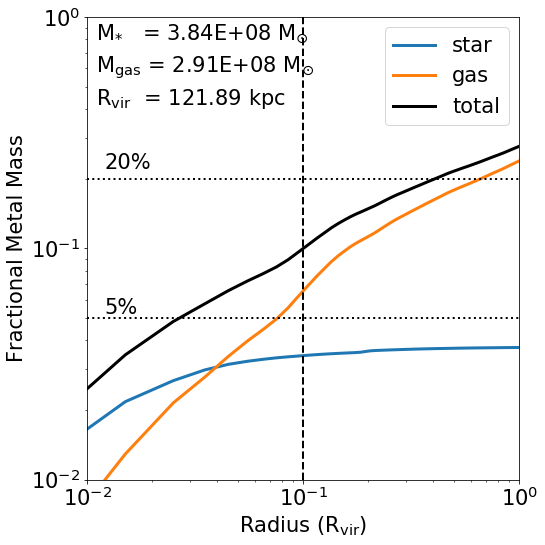

In [100]:
plot_settings()
fig,ax=plt.subplots()
fig.set_size_inches(8,8)
field = 'mass.fe'

normplot = np.cumsum( profile[field]['gas']['sum'] + profile[field]['star']['sum'] )

norm = norm_dict[field]

for ptype in ['star','gas']:
    ax.plot( profile[field][ptype]['distance']/halo_data['Rvir'],
             np.cumsum(profile[field][ptype]['sum']) / norm, label = ptype, lw = 3)
    
ax.plot( profile[field]['star']['distance']/halo_data['Rvir'],
             normplot/norm, label = 'total', color = 'black', lw = 3)
        
ax.set_ylim(0.01,1.0)
ax.set_xlim(0.01,1.0) 
#
#
#
ax.plot([0.1,0.1],ax.get_ylim(),color='black',lw=2,ls='--')

ax.plot(ax.get_xlim(),[0.05,0.05],color='black',lw=2,ls=':')
ax.plot(ax.get_xlim(),[0.20,0.20],color='black',lw=2,ls=':')
    
    
ax.legend(loc='best')

ax.semilogy()
ax.semilogx()

ax.set_ylabel(r'Fractional Metal Mass')
ax.set_xlabel(r"Radius (R$_{\rm vir}$)")


Mgas = np.sum(profile['mass']['gas']['sum'][profile['mass']['gas']['distance'] < 0.1*halo_data['Rvir']])
Mstar = np.sum(profile['mass']['star']['sum'][profile['mass']['star']['distance'] < 0.1*halo_data['Rvir']])

xy = (0.02,0.95)
ax.annotate(r'M$_{*}$   = %4.2E M$_{\odot}$'%(Mstar),xy,xy,xycoords='axes fraction')
xy = (0.02,0.88)
ax.annotate(r'M$_{\rm gas}$ = %4.2E M$_{\odot}$'%(Mgas),xy,xy,xycoords='axes fraction')
xy = (0.02,0.81)
ax.annotate(r'R$_{\rm vir}$  = %.2f kpc'%(halo_data['Rvir']),xy,xy,xycoords='axes fraction')


ax.annotate(r"20%", (0.012,0.22),(0.012,0.22))
ax.annotate(r"5%", (0.012,0.052),(0.012,0.052))

plt.tight_layout()

fig.savefig(wdir + '/m11q_res880_metaldiff.png')

In [2]:

runtype = 'metal_diff'
wdir = "/home/aemerick/work/gizmo_runs/" + runtype + '/'

files = np.array(glob.glob(wdir + "*.h5"))
galname = np.array([x.split('/')[-1].split('_profiles')[0] for x in files])
stellar_masses = np.zeros(np.size(files))


for i,fname in enumerate(files):
    stellar_masses[i] = dd.io.load(fname, '/stats/m_star')
    
s = np.argsort(stellar_masses)
stellar_masses = stellar_masses[s]
files = files[s]
galname = galname[s]

In [3]:
mdiff_files = files

In [5]:
only_plot = ['m10q_res250','m10v_res250','m11q_re7100','m11q_res880']

Mstar - 1.56984E+06   6.19586
Mstar - 2.36500E+06   6.37383
Mstar - 3.21303E+06   6.50691
Mstar - 1.44977E+08   8.16130
Mstar - 4.07773E+08   8.61042
Mstar - 6.68089E+08   8.82483
Mstar - 9.93782E+08   8.99729
Mstar - 1.49038E+09   9.17330
Mstar - 3.97010E+09   9.59880
Mstar - 4.32771E+09   9.63626


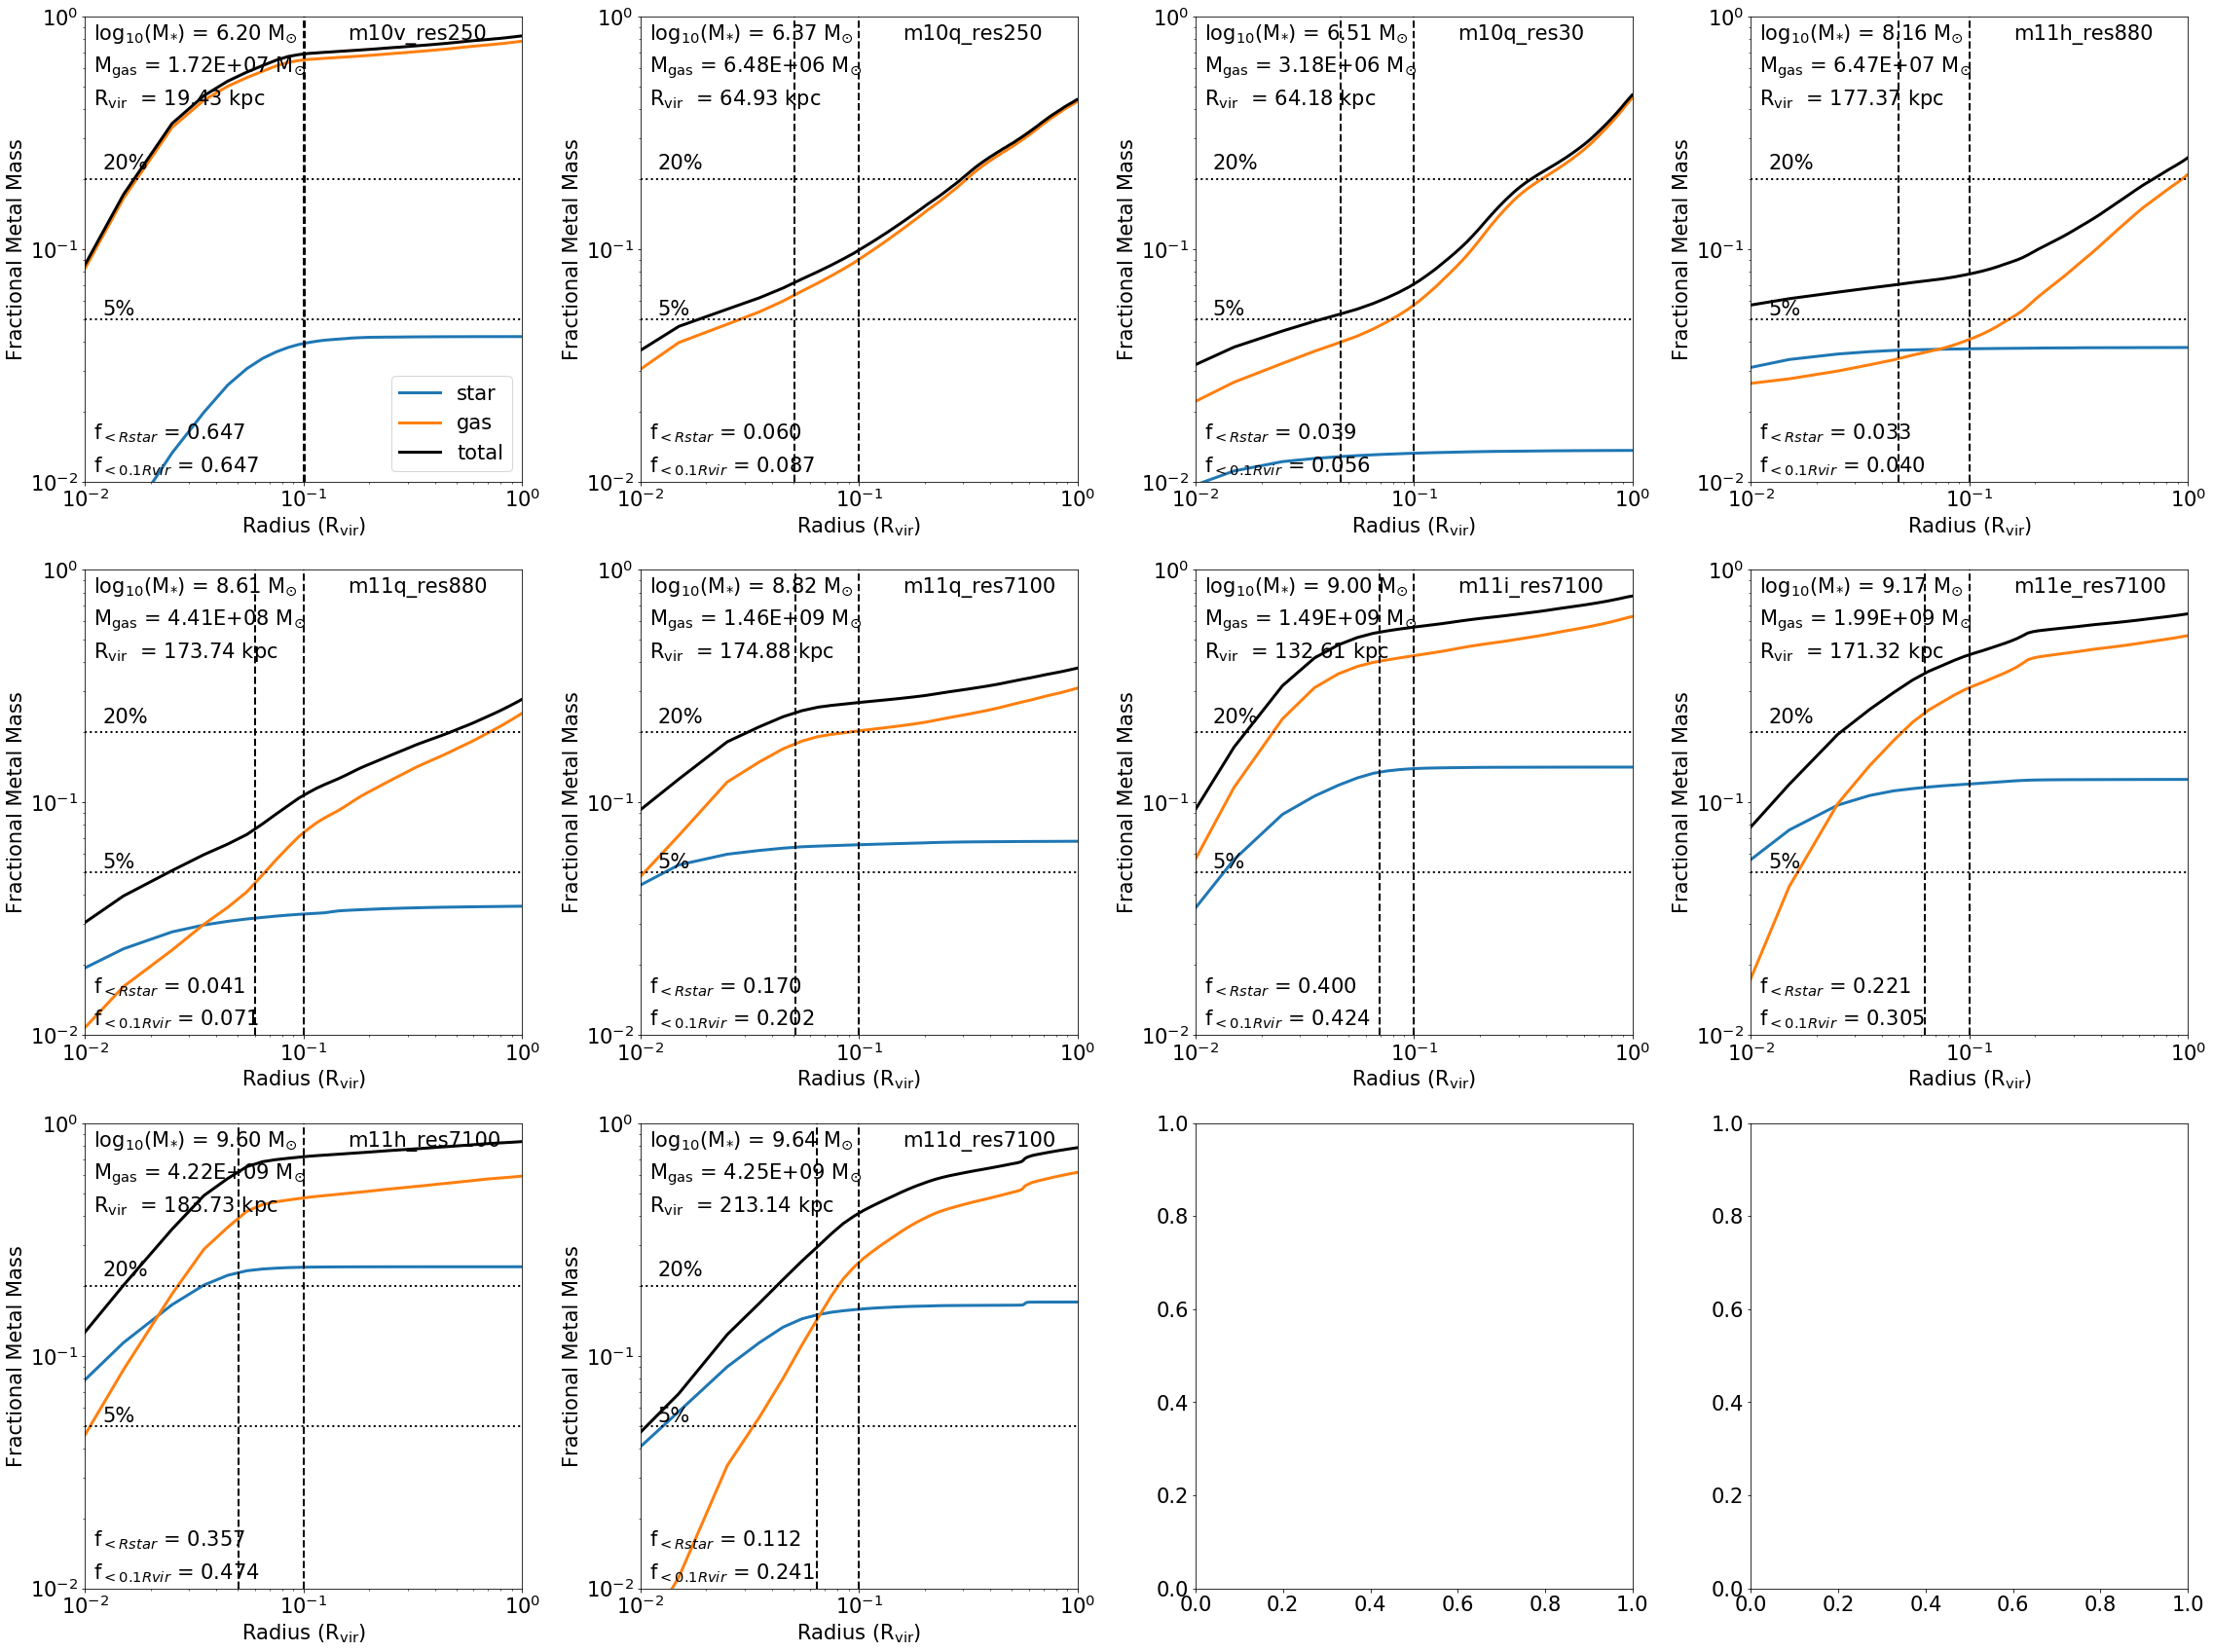

In [8]:
plot_settings()

if runtype == 'core':
    nrow = 5
    ncol = 4
else:
    nrow = 3
    ncol = 4
plot_settings()

fig,all_ax = plt.subplots(nrow,ncol)
fig.set_size_inches(ncol*8,nrow*8)

field = 'mass_metals'

axi,axj=0,0
for fname,gal in zip(files,galname):
    
    #if not(gal in only_plot):
    #    continue
    
    axindex = (axi,axj)
    
    ax = all_ax[axindex]
    
    data = dd.io.load(fname)
    
    profile    = data['profiles']
    halo_data  = data['halo_data']
    

    normplot = np.cumsum( profile[field]['gas']['sum'] + profile[field]['star']['sum'] )
    
    for ptype in ['star','gas']:
     
        R = profile[field][ptype]['distance']/halo_data['Rvir']    

        norm = profile['norm'][field]

        ax.plot( R,
                 np.cumsum(profile[field][ptype]['sum']) / norm, label = ptype, lw = 3)
    
    ax.plot( R,
                 normplot/norm, label = 'total', color = 'black', lw = 3)    
    
    
    ax.set_ylim(0.01,1.0)
    ax.set_xlim(0.01,1.0) 
    #
    #
    #
    rgas = halo_data['R_star'] / halo_data['Rvir']
    ax.plot([rgas,rgas],ax.get_ylim(),color='black',lw=2,ls='--')
    ax.plot([0.1,0.1],ax.get_ylim(),color='black',lw=2,ls='--')

    ax.plot(ax.get_xlim(),[0.05,0.05],color='black',lw=2,ls=':')
    ax.plot(ax.get_xlim(),[0.20,0.20],color='black',lw=2,ls=':')

    
    f_gas = (np.sum( profile[field]['gas']['sum'][R<rgas]) / norm)
    f_ism = (np.sum( profile[field]['gas']['sum'][R<0.1]) / norm)
    
    

    xy = (0.02,0.09)
    ax.annotate(r'f$_{ < Rstar}$ = %0.3f '%(f_gas),xy,xy,xycoords='axes fraction')
    xy = (0.02,0.02)
    ax.annotate(r'f$_{ < 0.1 Rvir}$ = %0.3f '%(f_ism),xy,xy,xycoords='axes fraction')
    
    ax.semilogy()
    ax.semilogx()

    ax.set_ylabel(r'Fractional Metal Mass')
    ax.set_xlabel(r"Radius (R$_{\rm vir}$)")


    Mgas = data['stats']['m_gas']
    Mstar = data['stats']['m_star']
    
    print("Mstar - %5.5E   %5.5f"%(Mstar,np.log10(Mstar)))

    xy = (0.02,0.95)
    ax.annotate(r'log$_{10}$(M$_{*}$) = %2.2f M$_{\odot}$'%(np.log10(Mstar)),xy,xy,xycoords='axes fraction')
    xy = (0.02,0.88)
    ax.annotate(r'M$_{\rm gas}$ = %4.2E M$_{\odot}$'%(Mgas),xy,xy,xycoords='axes fraction')
    xy = (0.02,0.81)
    ax.annotate(r'R$_{\rm vir}$  = %.2f kpc'%(halo_data['Rvir']),xy,xy,xycoords='axes fraction')
    
    xy = (0.6,0.95)
    ax.annotate(gal,xy,xy,xycoords='axes fraction')


    ax.annotate(r"20%", (0.012,0.22),(0.012,0.22))
    ax.annotate(r"5%", (0.012,0.052),(0.012,0.052))    
    
    
    axj = axj + 1
    if axj >= ncol:
        axj=0
        axi=axi+1
        
all_ax[(0,0)].legend(loc='lower right')
        
plt.tight_layout()

fig.savefig(runtype + "_galaxies.png")

In [41]:
runtype

'metal_diff'

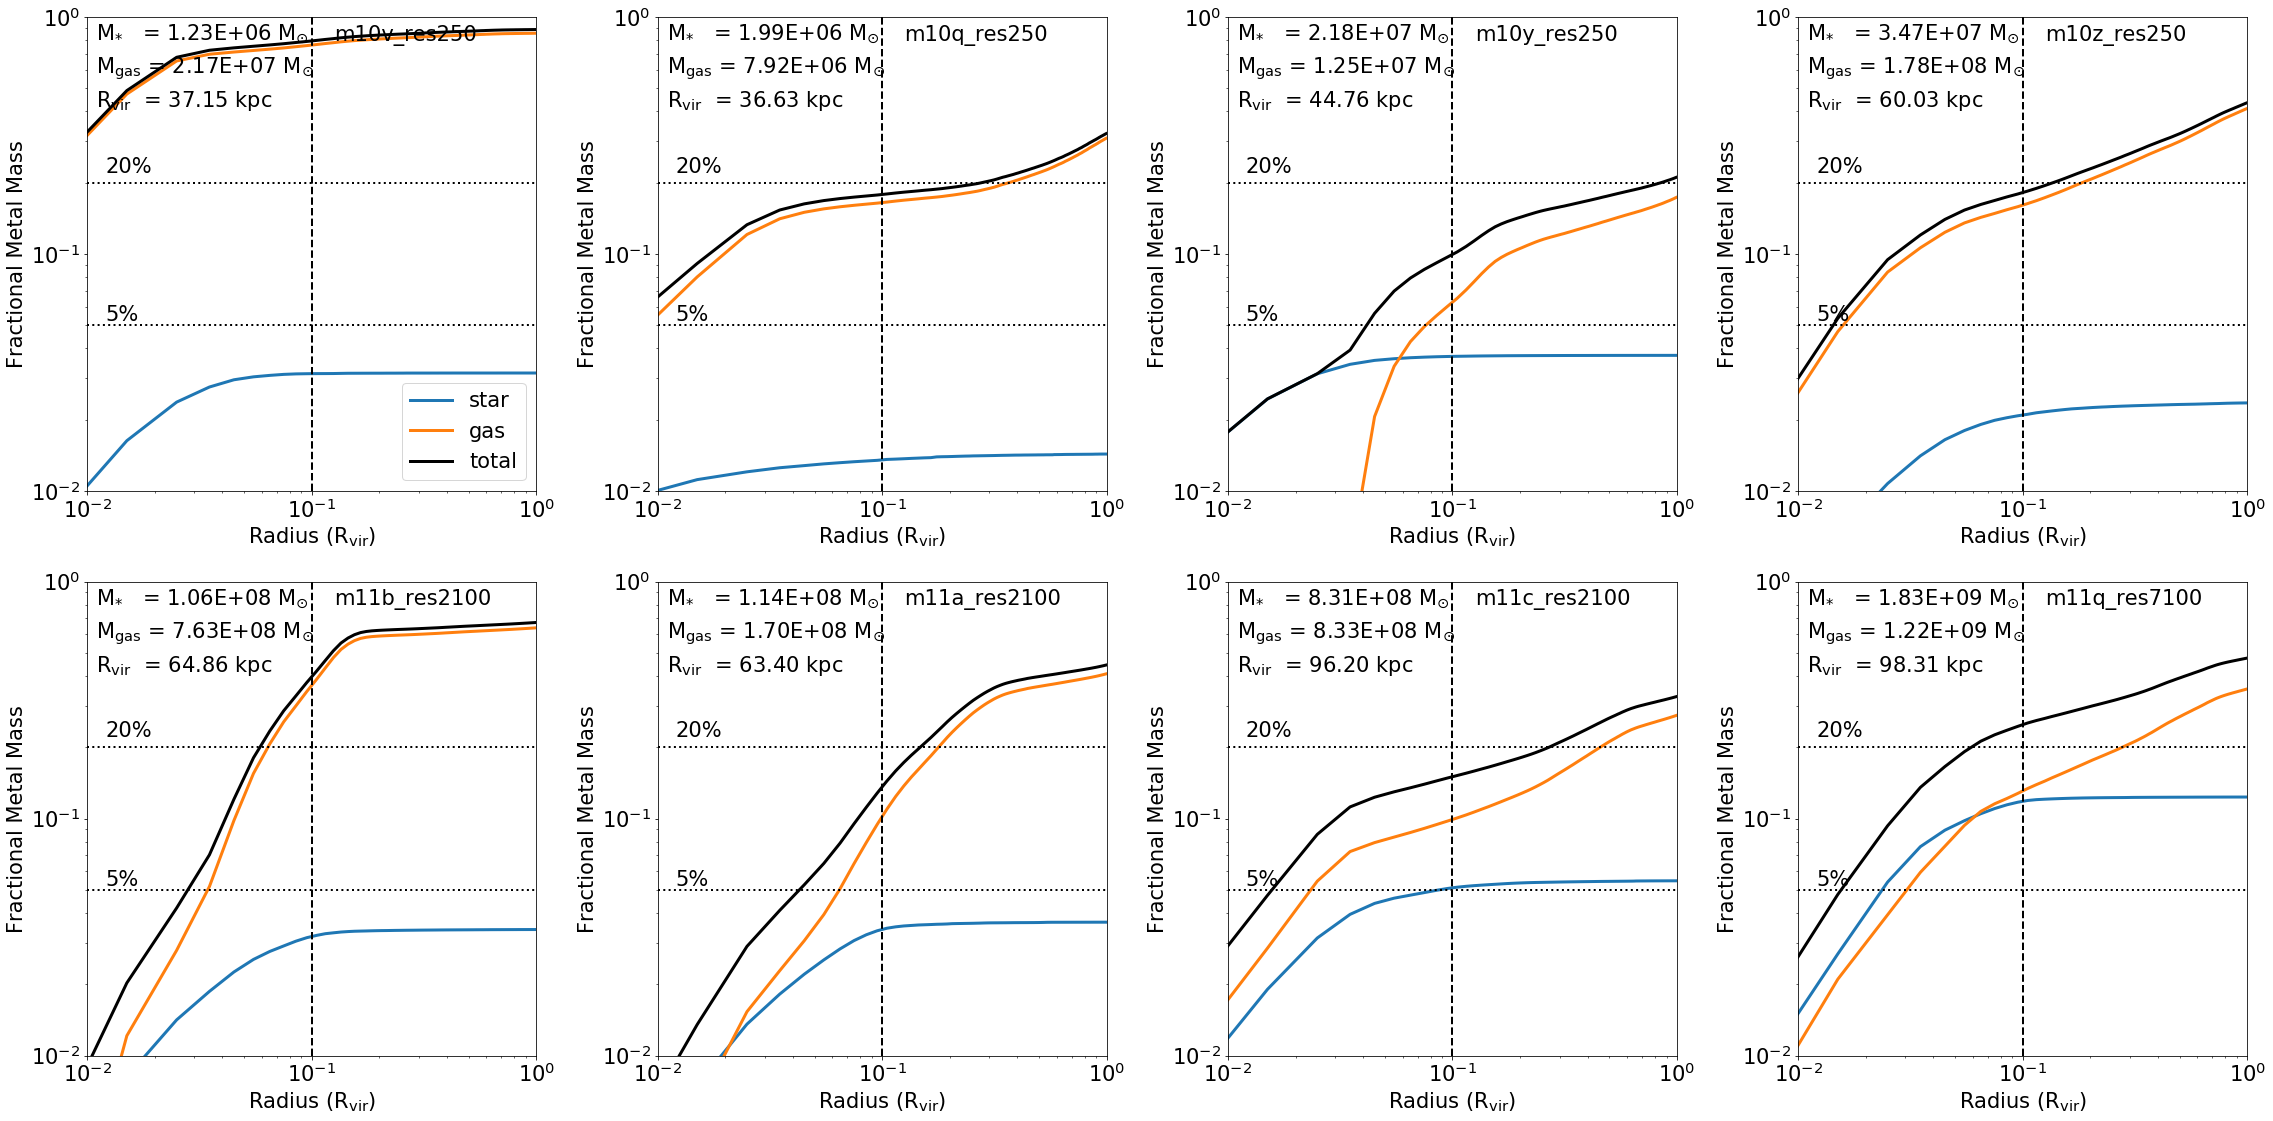

In [12]:
wdir = "/home/aemerick/work/gizmo_runs/muratov/"

files = np.array(glob.glob(wdir + "*.h5"))
galname = np.array([x.split('/')[-1].split('_profiles')[0] for x in files])
stellar_masses = np.zeros(np.size(files))


for i,fname in enumerate(files):
    stellar_masses[i] = dd.io.load(fname, '/stats/m_star')
    
s = np.argsort(stellar_masses)
stellar_masses = stellar_masses[s]
files = files[s]
galname = galname[s]


#########
nrow = 2
ncol = 4
plot_settings()

fig,all_ax = plt.subplots(nrow,ncol)
fig.set_size_inches(ncol*8,nrow*8)

field = 'mass_metals'

axi,axj=0,0
for fname,gal in zip(files,galname):
    axindex = (axi,axj)
    
    ax = all_ax[axindex]
    
    data = dd.io.load(fname)
    
    profile    = data['profiles']
    halo_data  = data['halo_data']
    

    normplot = np.cumsum( profile[field]['gas']['sum'] + profile[field]['star']['sum'] )

    norm = profile['norm'][field]

    for ptype in ['star','gas']:
        ax.plot( profile[field][ptype]['distance']/halo_data['Rvir'],
                 np.cumsum(profile[field][ptype]['sum']) / norm, label = ptype, lw = 3)
    
    ax.plot( profile[field]['star']['distance']/halo_data['Rvir'],
                 normplot/norm, label = 'total', color = 'black', lw = 3)    
    
    
    ax.set_ylim(0.01,1.0)
    ax.set_xlim(0.01,1.0) 
    #
    #
    #
    ax.plot([0.1,0.1],ax.get_ylim(),color='black',lw=2,ls='--')

    ax.plot(ax.get_xlim(),[0.05,0.05],color='black',lw=2,ls=':')
    ax.plot(ax.get_xlim(),[0.20,0.20],color='black',lw=2,ls=':')



    ax.semilogy()
    ax.semilogx()

    ax.set_ylabel(r'Fractional Metal Mass')
    ax.set_xlabel(r"Radius (R$_{\rm vir}$)")


    Mgas = data['stats']['m_gas']
    Mstar = data['stats']['m_star']

    xy = (0.02,0.95)
    ax.annotate(r'M$_{*}$   = %4.2E M$_{\odot}$'%(Mstar),xy,xy,xycoords='axes fraction')
    xy = (0.02,0.88)
    ax.annotate(r'M$_{\rm gas}$ = %4.2E M$_{\odot}$'%(Mgas),xy,xy,xycoords='axes fraction')
    xy = (0.02,0.81)
    ax.annotate(r'R$_{\rm vir}$  = %.2f kpc'%(halo_data['Rvir']),xy,xy,xycoords='axes fraction')
    
    xy = (0.55,0.95)
    ax.annotate(gal,xy,xy,xycoords='axes fraction')


    ax.annotate(r"20%", (0.012,0.22),(0.012,0.22))
    ax.annotate(r"5%", (0.012,0.052),(0.012,0.052))    
    
    
    axj = axj + 1
    if axj >= ncol:
        axj=0
        axi=axi+1
        
all_ax[(0,0)].legend(loc='lower right')
        
plt.tight_layout()